# Product Detection (Shopee Code League 2020)

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.plotting.register_matplotlib_converters()
import cv2 
import seaborn as sns
%matplotlib inline

print(tf.__version__)
ds_path = "./data/train/train"

2.0.0


## Data Exploration

### Read dataset and images

In [2]:
d_train = pd.read_csv("./data/train.csv")

In [3]:
d_train.shape

(105392, 2)

In [4]:
d_train.columns

Index(['filename', 'category'], dtype='object')

In [5]:
category = d_train.category.unique()
category

array([ 3,  4, 32, 35, 34, 33,  5,  2, 20, 18, 27, 11, 29, 16, 28, 17, 10,
       19, 26, 21,  7, 38,  0, 36,  9, 31, 30, 37,  8,  1,  6, 39, 41, 24,
       23, 15, 12, 40, 13, 14, 22, 25])

In [11]:
d_show = d_train.groupby("category", as_index=False).apply(lambda o: o.iloc[0, :])

In [12]:
len(d_show)

42

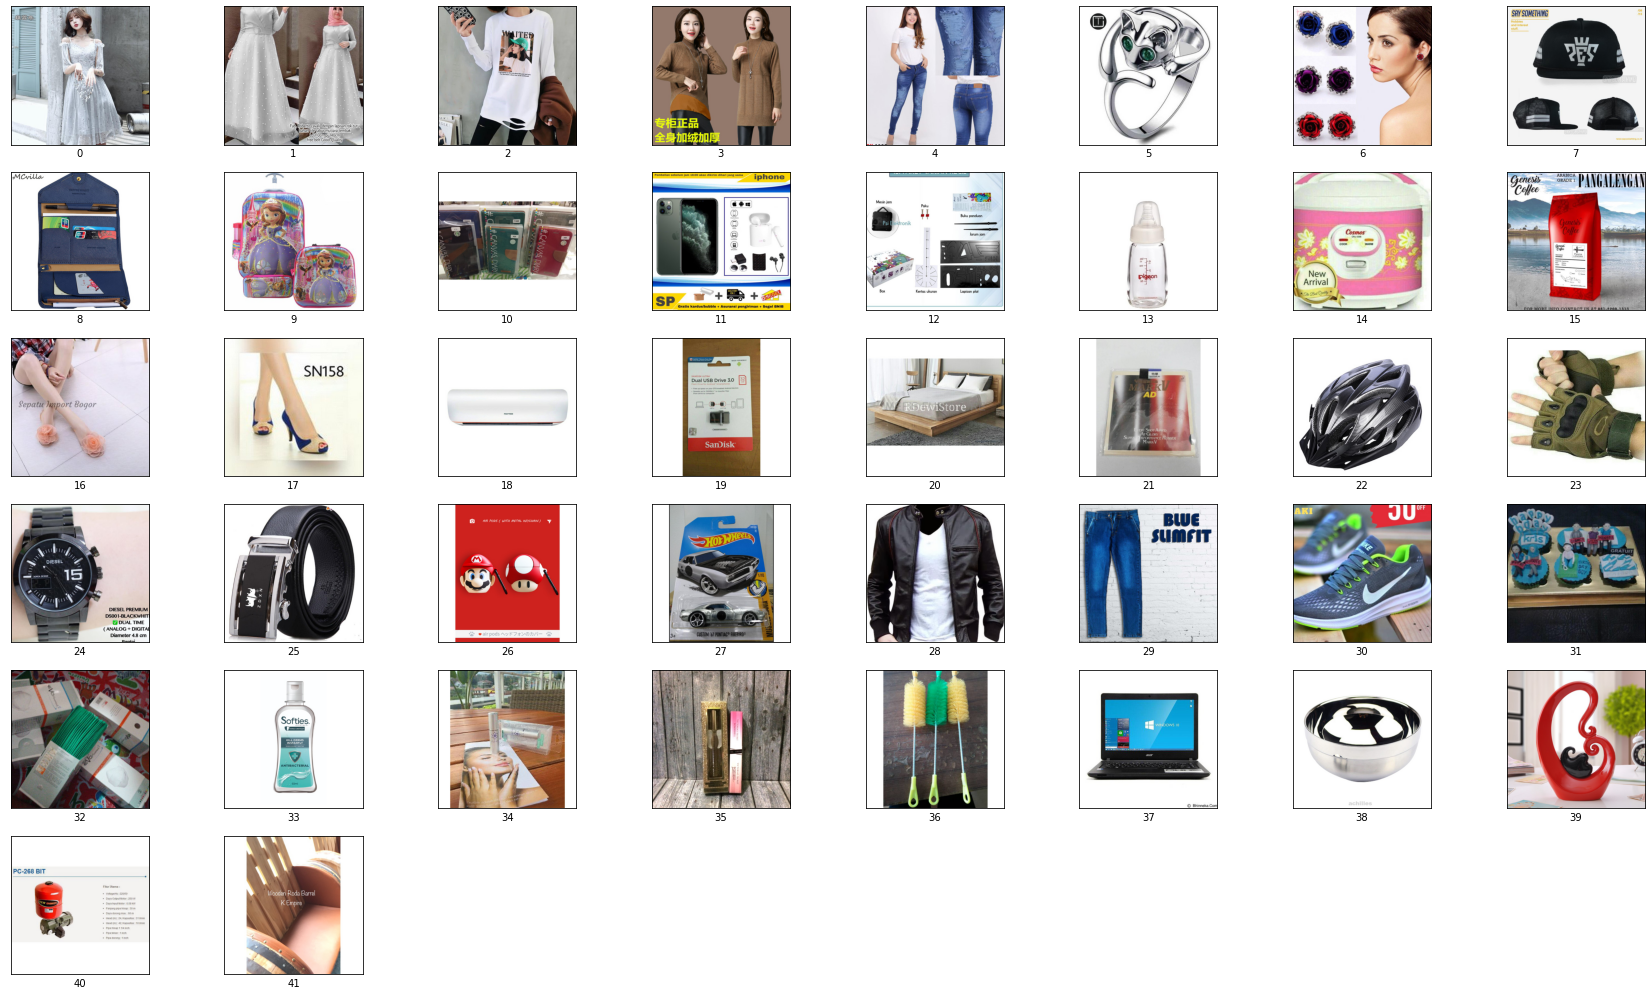

In [8]:
plt.figure(figsize=(30,30))
for i in range(len(d_show)):
    r = d_show.iloc[i]
    plt.subplot(10,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
  
    path = "%s/%02d/%s" % (ds_path, r.category, r.filename)
    plt.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
    plt.xlabel(r.category)
plt.show()

In [19]:
d_d = d_train.groupby("category", as_index=False).count()

In [31]:
d_d

category  filename
0          0      2683
1          1      2702
2          2      2687
3          3      2703
4          4      2703
5          5      2641
6          6      2641
7          7      2660
8          8      2700
9          9      2698
10        10      2672
11        11      1843
12        12      2691
13        13      2682
14        14      2684
15        15      2632
16        16      2665
17        17      1553
18        18      2103
19        19      2679
20        20      2653
21        21      2598
22        22      2623
23        23      2540
24        24      2705
25        25      2692
26        26      2684
27        27      2702
28        28      2561
29        29      2138
30        30      2705
31        31      2677
32        32      2157
33        33       573
34        34      2599
35        35      2658
36        36      2686
37        37      1725
38        38      2673
39        39      2678
40        40      2681
41        41      2662

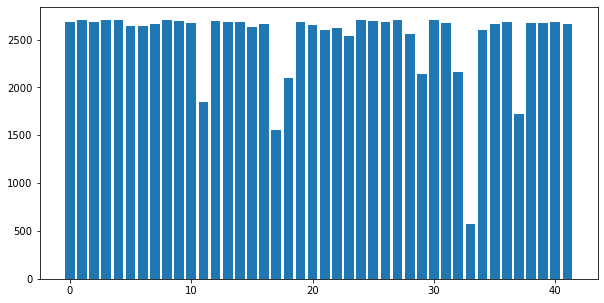

In [20]:
plt.figure(figsize=(10,5))
plt.bar(d_d.category, d_d.filename)
plt.show()

## Analyze and build Model

Select 200 images each category

In [21]:
CLASSIFICATION_SIZE = 500

d_reduced = d_train.groupby("category", as_index=False).apply(lambda o: o.sample(n=CLASSIFICATION_SIZE, random_state=1))

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

Read images, resize to 200x200

In [23]:
X = []
y = []
img_size = (200, 200)

i = 0
while i < len(d_reduced):
    r = d_reduced.iloc[i]
    path = "%s/%02d/%s" % (ds_path, r.category, r.filename)
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, img_size)
    X.append(img)
    y.append(r.category)
    i += 1

X = np.array(X)
y = np.array(y)

In [24]:
X = X / 255.0

In [25]:
X

array([[[0.33333333, 0.2745098 , 0.29803922, ..., 0.96862745,
         0.96078431, 0.83137255],
        [0.37254902, 0.3372549 , 0.35294118, ..., 0.96078431,
         0.84313725, 0.70588235],
        [0.41960784, 0.38039216, 0.36470588, ..., 0.96470588,
         0.76470588, 0.62745098],
        ...,
        [0.51764706, 0.51764706, 0.52156863, ..., 0.33333333,
         0.33333333, 0.31372549],
        [0.51372549, 0.52156863, 0.52941176, ..., 0.34901961,
         0.3254902 , 0.31764706],
        [0.49411765, 0.49803922, 0.50196078, ..., 0.50588235,
         0.50980392, 0.49803922]],

       [[0.66666667, 0.64313725, 0.68235294, ..., 0.18039216,
         0.18431373, 0.18039216],
        [0.65490196, 0.62352941, 0.6627451 , ..., 0.16862745,
         0.16862745, 0.18039216],
        [0.6627451 , 0.62352941, 0.65490196, ..., 0.17647059,
         0.17647059, 0.17647059],
        ...,
        [0.61176471, 0.60392157, 0.6       , ..., 0.62352941,
         0.61568627, 0.63137255],
        [0.6

Create train, test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Visualize

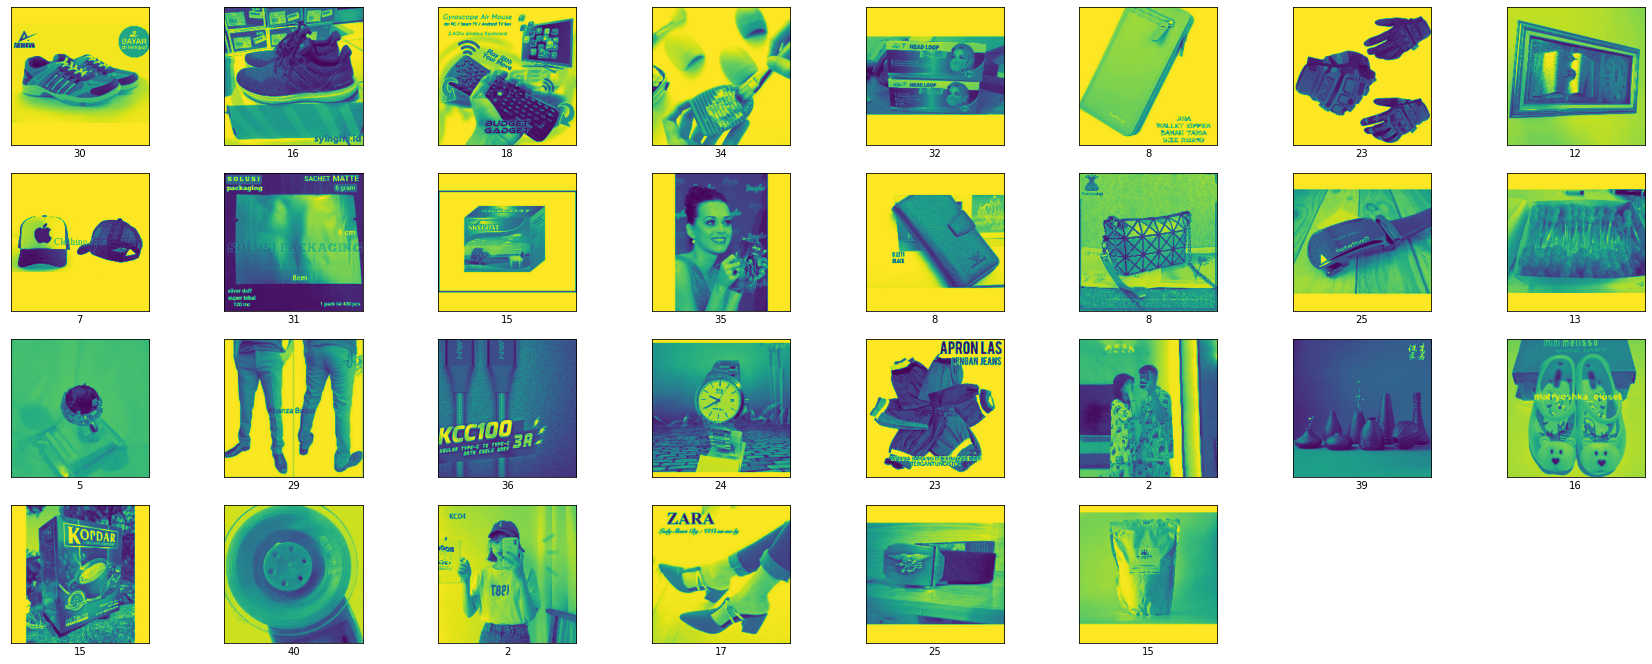

In [27]:
plt.figure(figsize=(30,30))
for i in range(30):
    plt.subplot(10,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plt.imshow(X_train[i], cv2.COLOR_GRAY2RGB))
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

Create layer for NN

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=img_size),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(category), activation='softmax')
])

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train model

In [30]:
model.fit(X_train, y_train, epochs=10)

Train on 16800 samples
Epoch 1/10
16800/16800 [==============================] - 70s 4ms/sample - loss: 4.6529 - accuracy: 0.0252
Epoch 2/10
16800/16800 [==============================] - 68s 4ms/sample - loss: 3.7375 - accuracy: 0.0248
Epoch 3/10
16800/16800 [==============================] - 113s 7ms/sample - loss: 3.7374 - accuracy: 0.0253
Epoch 4/10
16800/16800 [==============================] - 63s 4ms/sample - loss: 3.7378 - accuracy: 0.0235
Epoch 5/10
16800/16800 [==============================] - 71s 4ms/sample - loss: 3.7372 - accuracy: 0.0250
Epoch 6/10
16800/16800 [==============================] - 75s 4ms/sample - loss: 3.7373 - accuracy: 0.0243
Epoch 7/10
16800/16800 [==============================] - 67s 4ms/sample - loss: 3.7371 - accuracy: 0.0248
Epoch 8/10
16800/16800 [==============================] - 69s 4ms/sample - loss: 3.7371 - accuracy: 0.0250
Epoch 9/10
16800/16800 [==============================] - 69s 4ms/sample - loss: 3.7371 - accuracy: 0.0240
Epoch 10/10
1

Test with validation set

In [32]:
model.evaluate(X_test,  y_test, verbose=2)

4200/1 - 3s - loss: 3.7382 - accuracy: 0.0183


[3.740687706356957, 0.018333333]